In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df['Churn'] = df['Churn'].map({'Yes':1, 'No':0})

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441,0.265370
std,0.368612,24.559481,30.090047,2265.000258,0.441561
min,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,9.000000,35.500000,402.225000,0.000000
50%,0.000000,29.000000,70.350000,1400.550000,0.000000
75%,0.000000,55.000000,89.850000,3786.600000,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# Convert 'TotalCharges' to numeric, coercing errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
# Fill NaN values with 0. Alternatively, you could fill with the mean/median or drop rows.
df['TotalCharges'] = df['TotalCharges'].fillna(np.mean(df['TotalCharges']))


In [ ]:
print("\nMissing values per column:\n", df.isnull().sum())

print("\nUnique values per column:\n")
for col in df.columns:
    num_unique = df[col].nunique()
    print(f"  {col}: {num_unique} unique values")
    if num_unique < 20 and num_unique > 0: # Arbitrary threshold for displaying value counts
        print(f"    Value counts for {col}:\n{df[col].value_counts()}\n")


Missing values per column:
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Unique values per column:

  customerID: 7043 unique values
  gender: 2 unique values
    Value counts for gender:
gender
Male      3555
Female    3488
Name: count, dtype: int64

  SeniorCitizen: 2 unique values
    Value counts for SeniorCitizen:
SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

  Partner: 2 unique values
    Value counts for Partner:
Partner
No     3641
Yes    3402
Name: count, dtype: int64

  Dependents: 2 unique values
    Value counts for Dependents:
Depende

Categorical columns identified for analysis: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'SeniorCitizen']


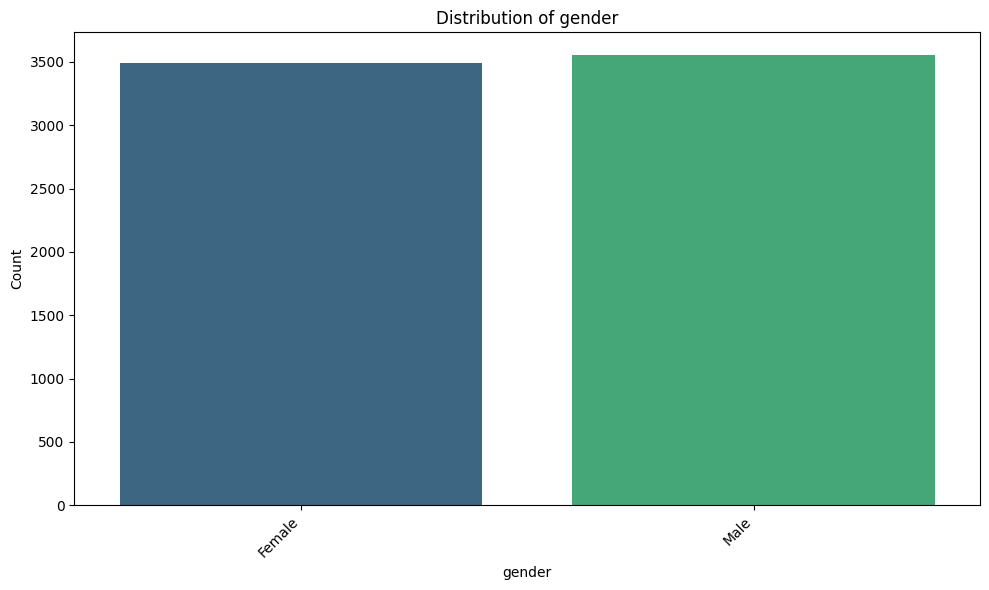

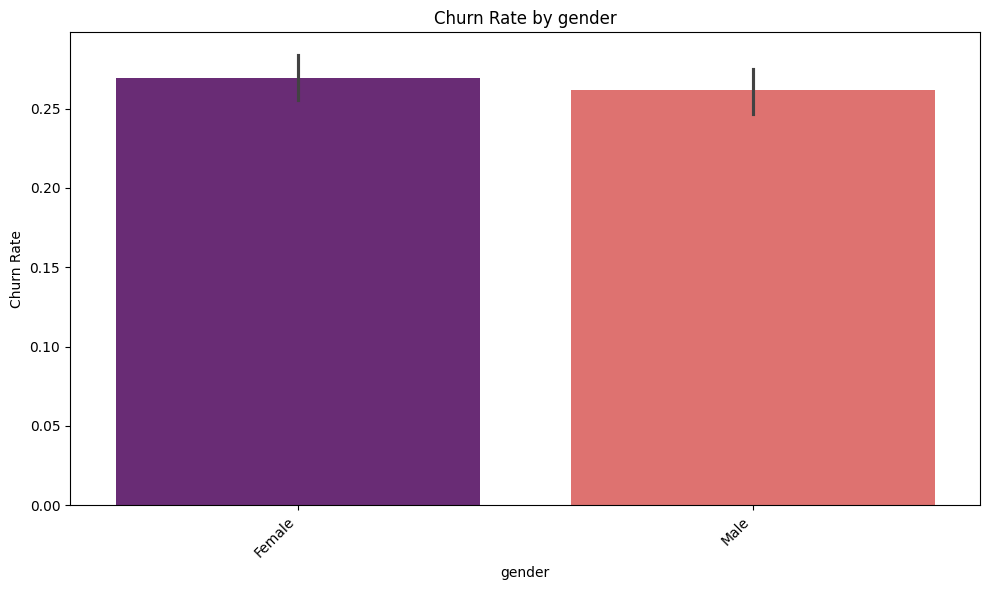

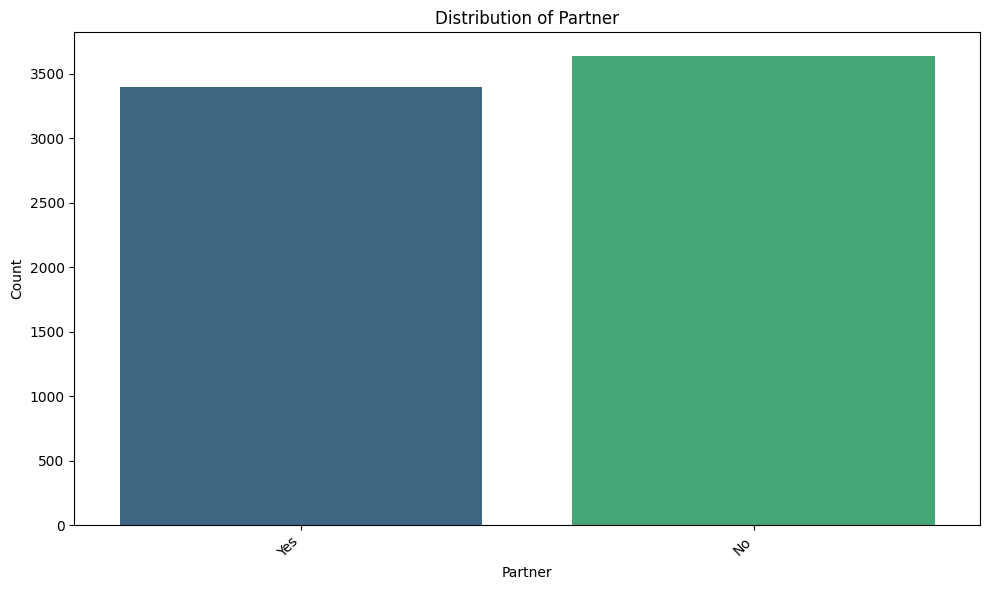

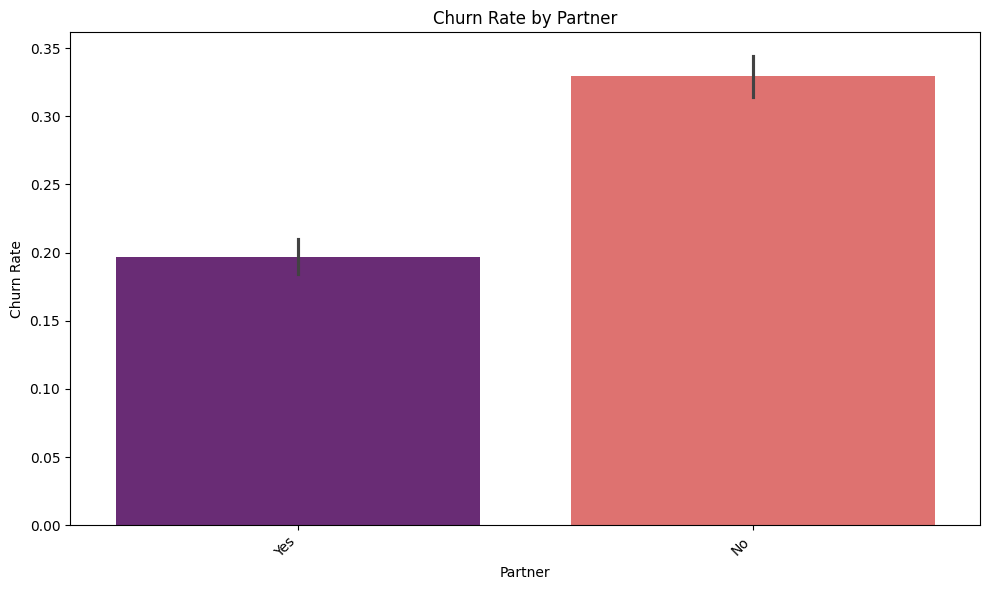

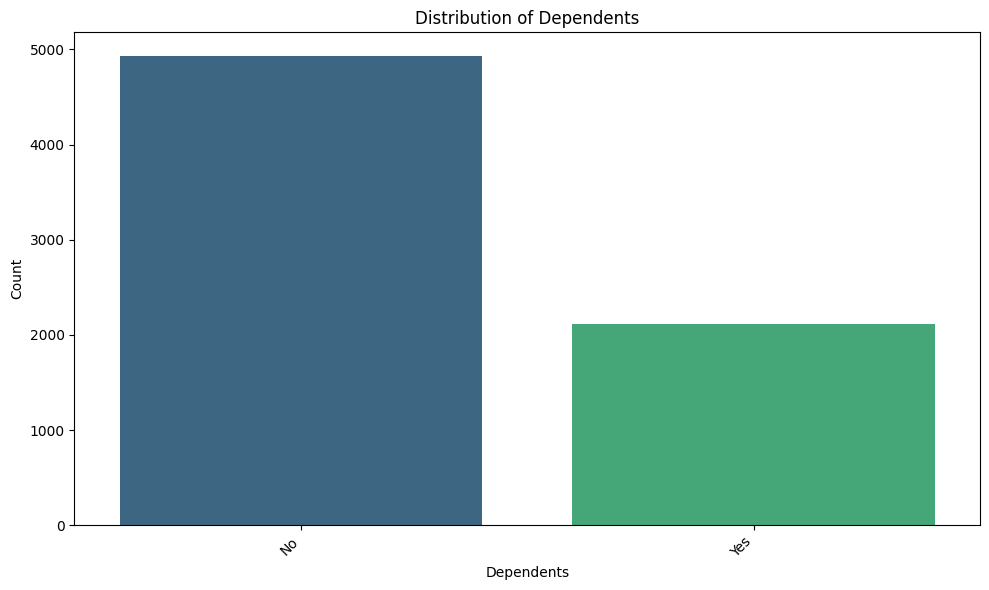

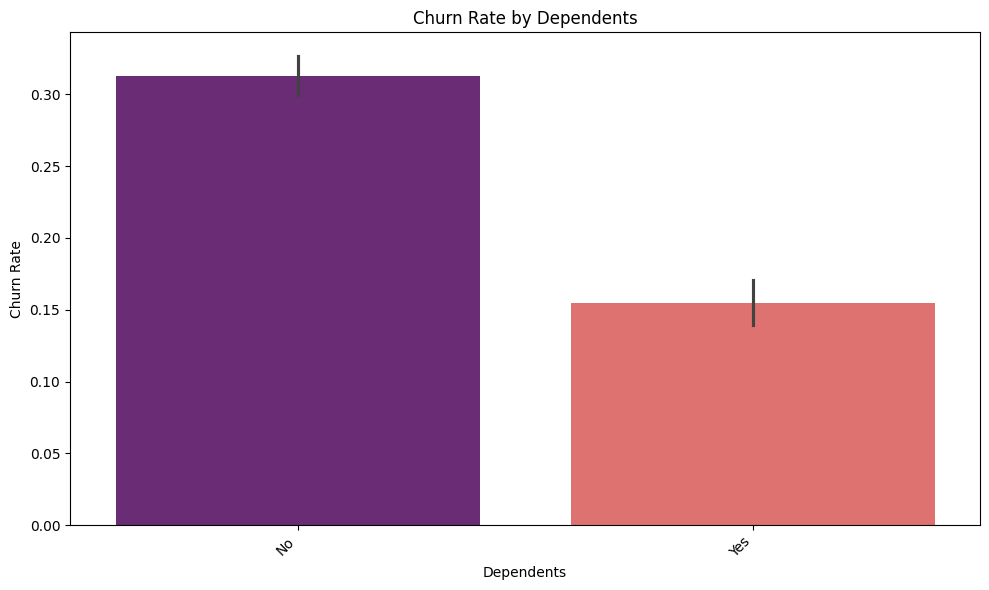

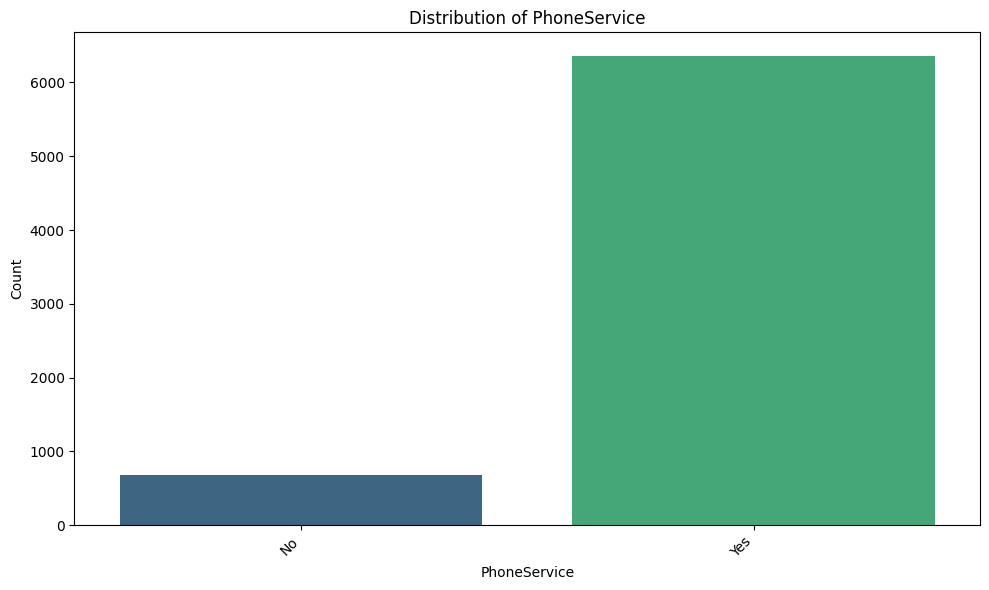

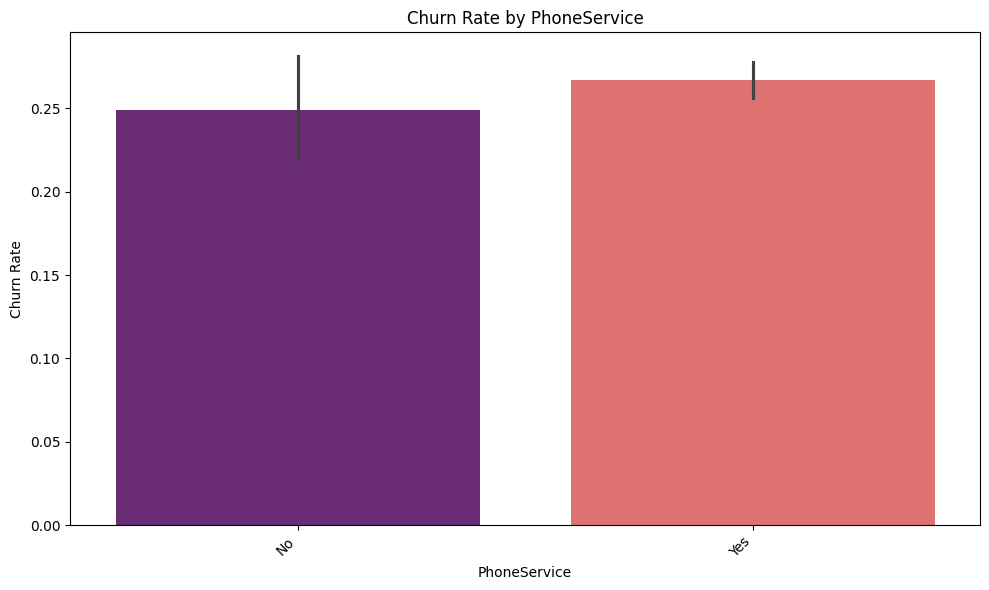

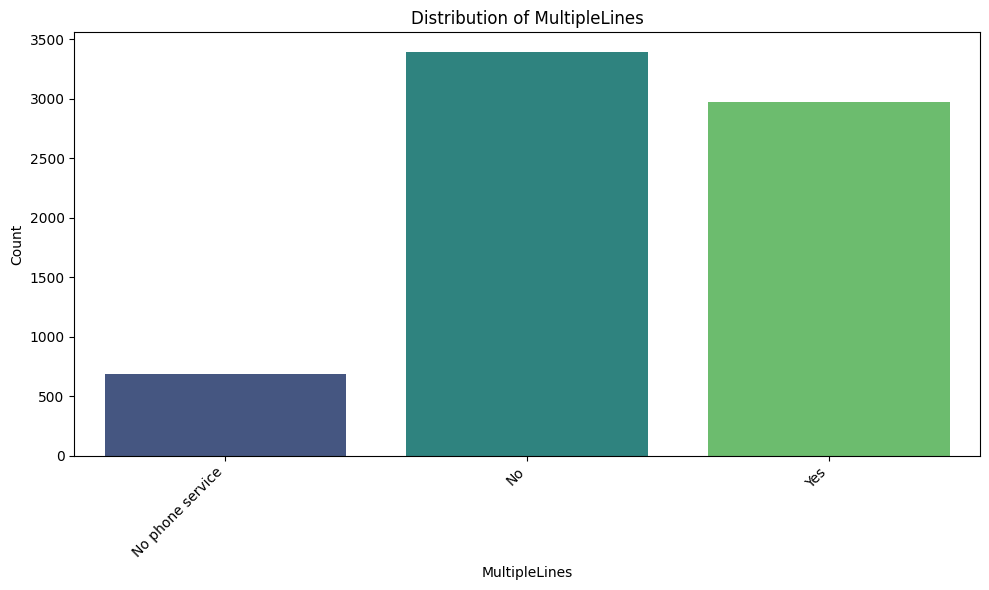

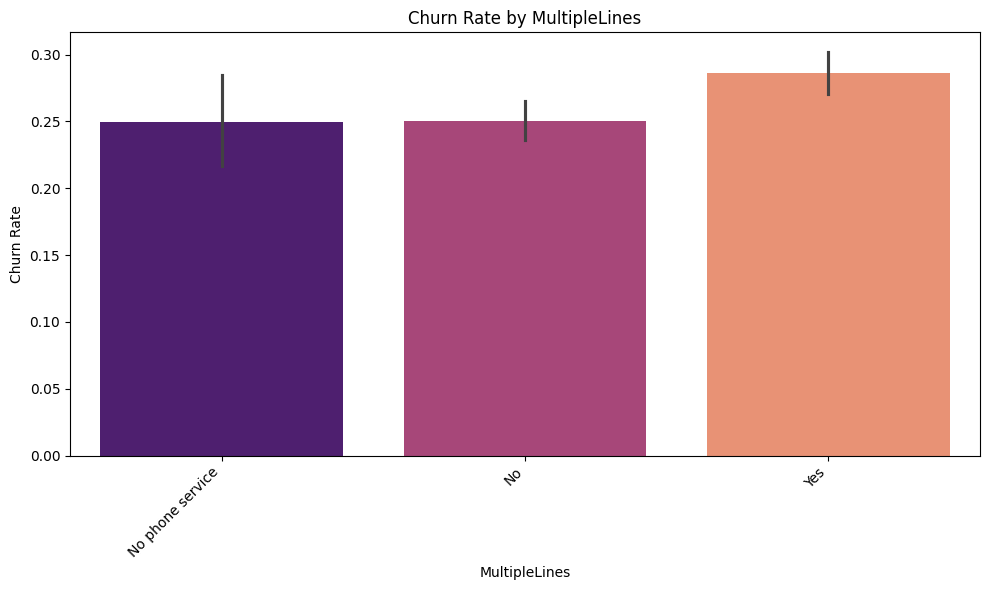

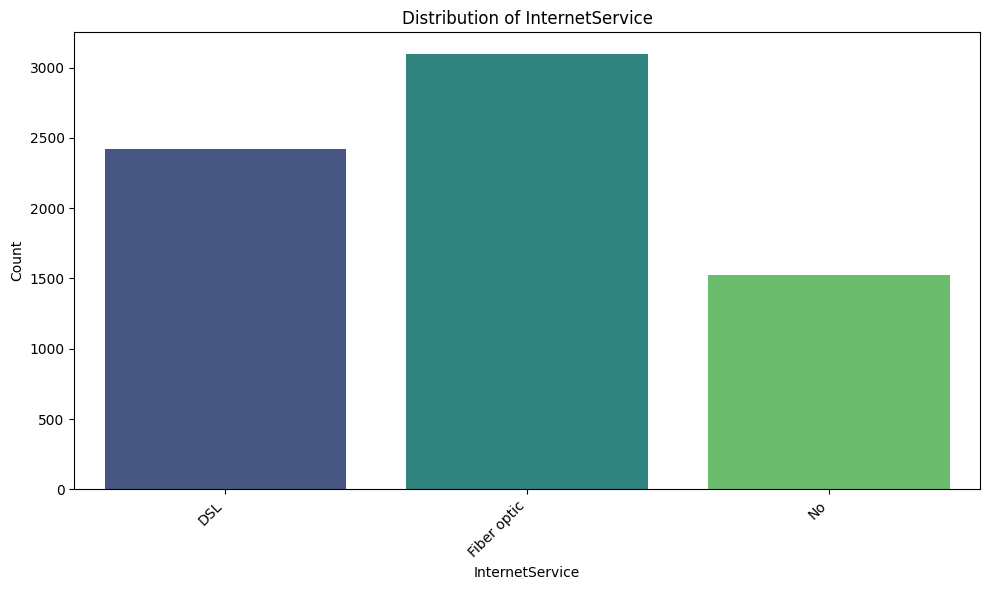

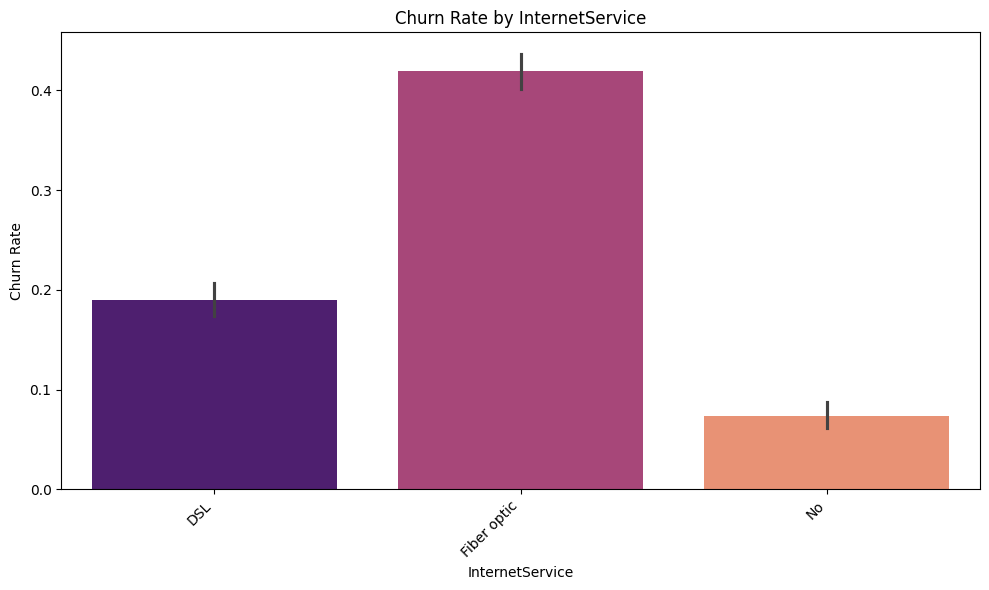

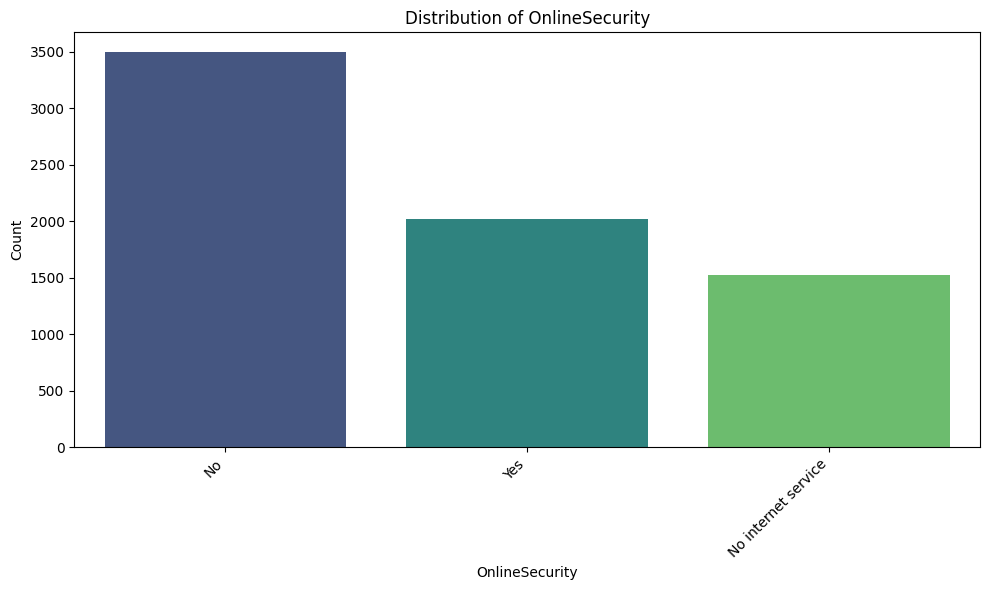

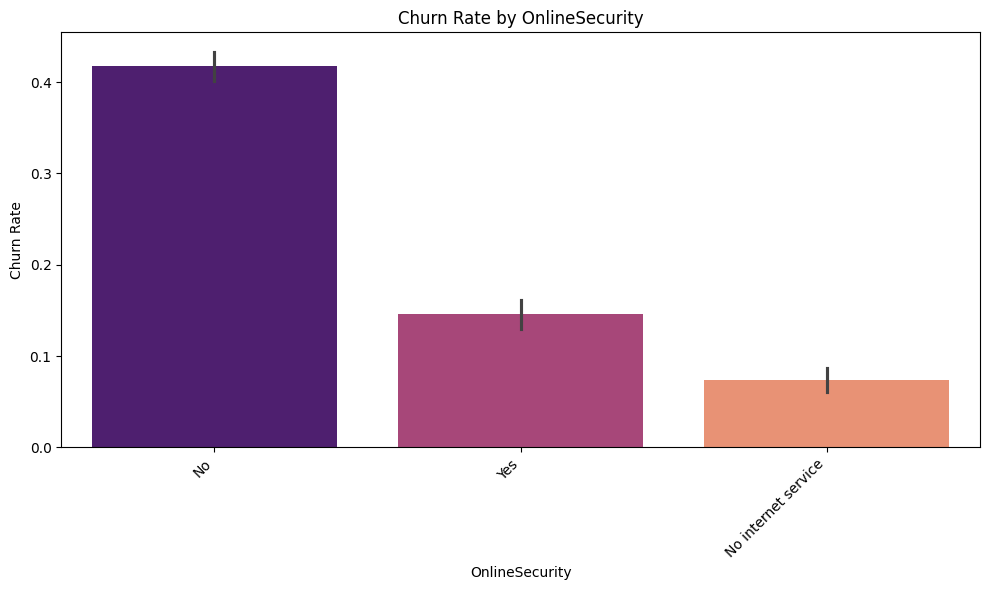

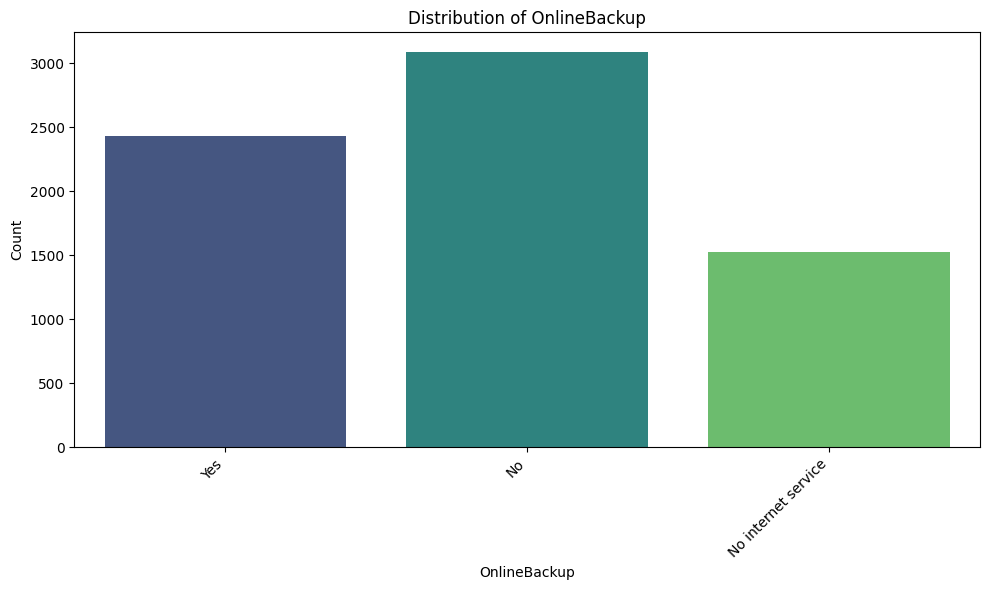

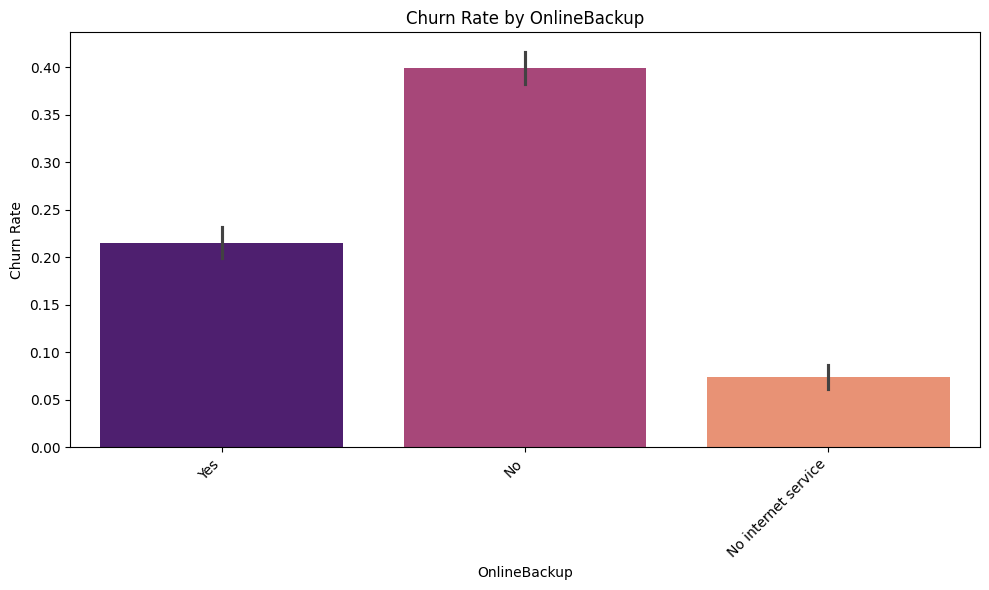

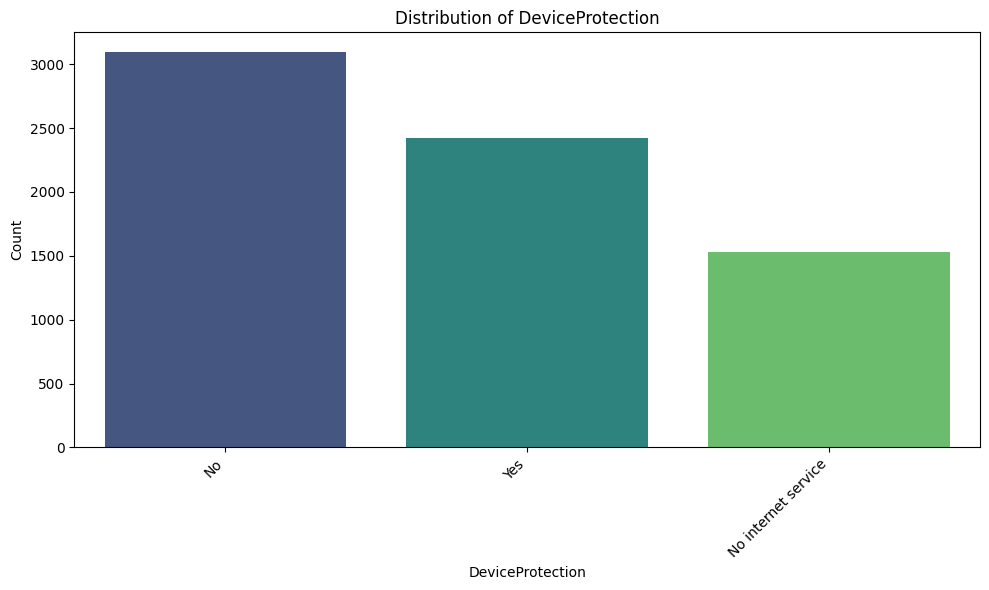

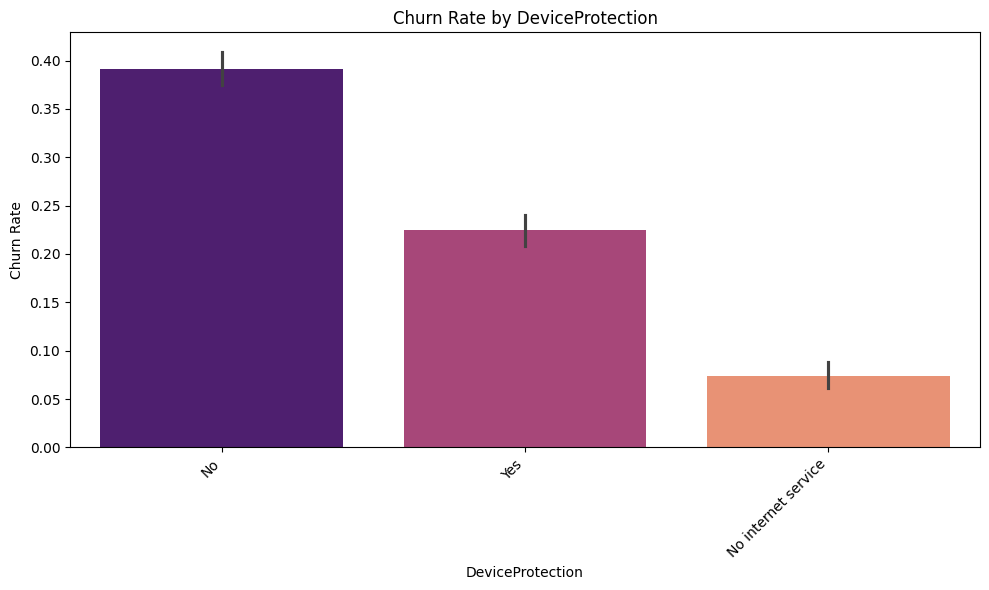

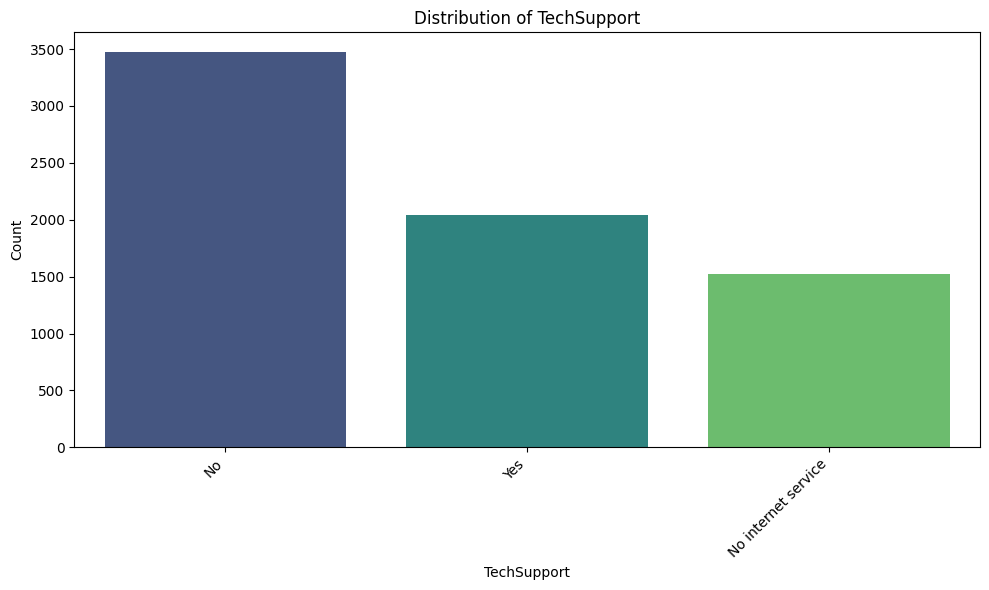

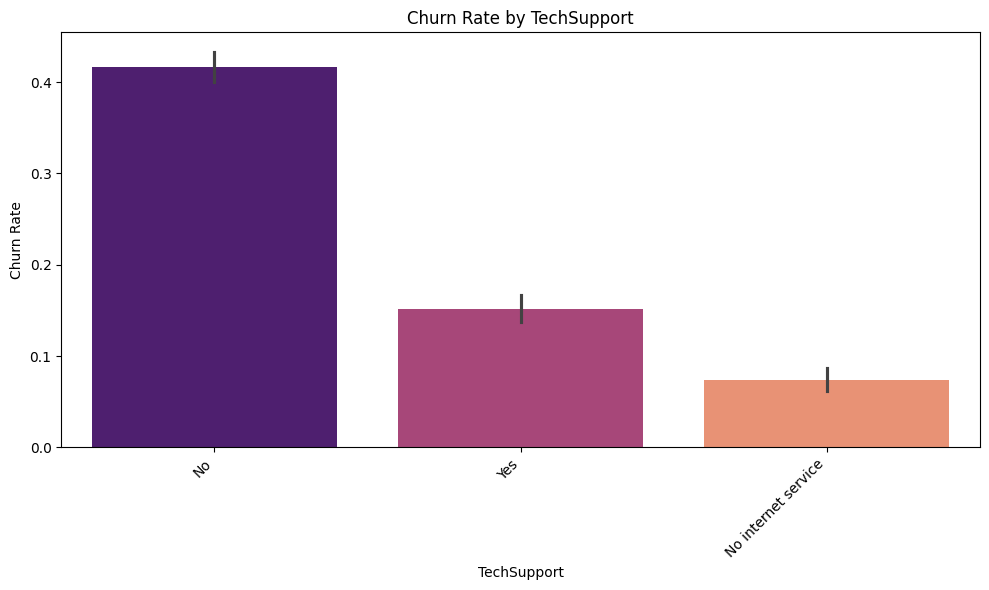

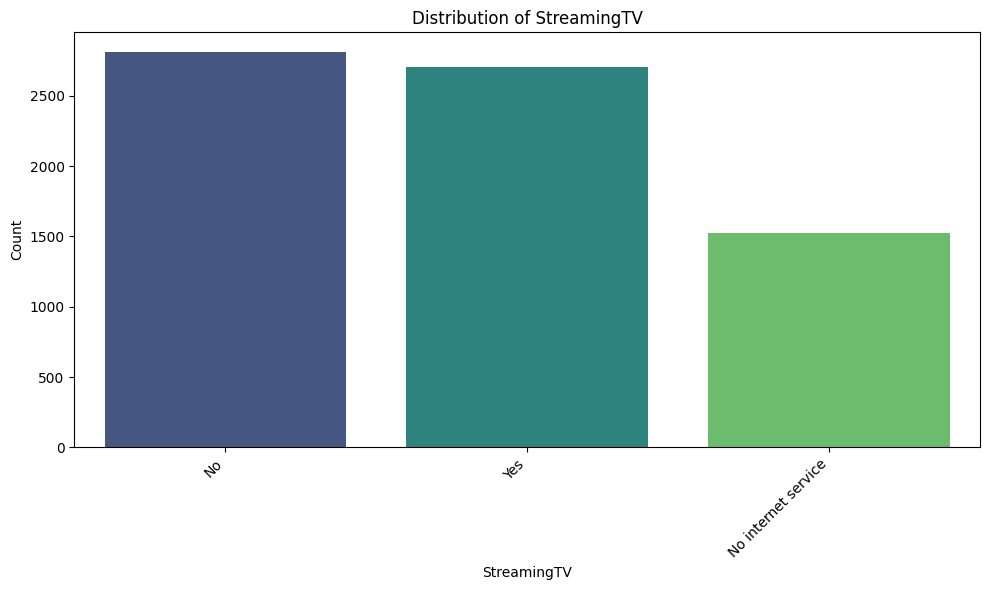

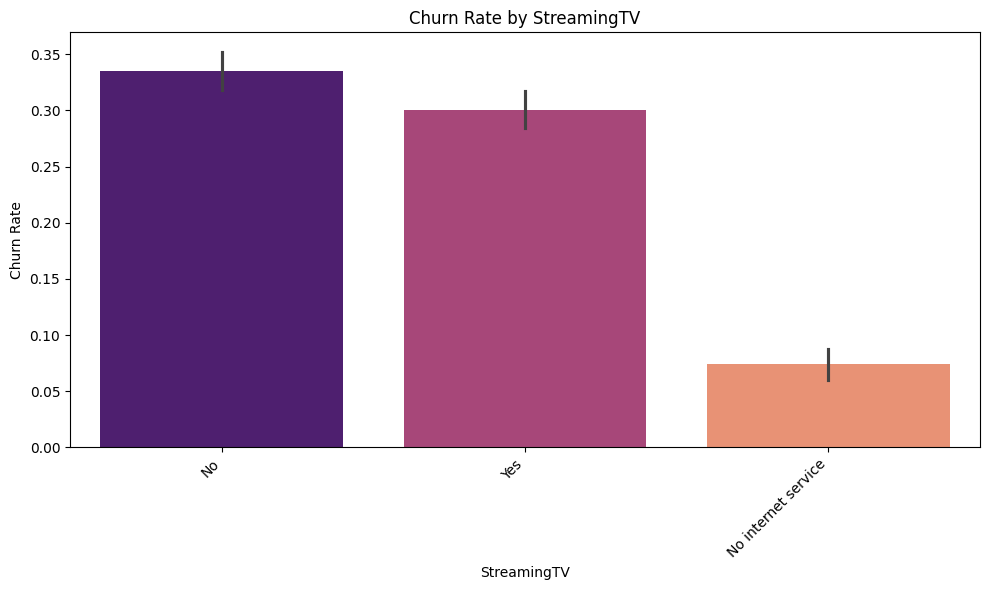

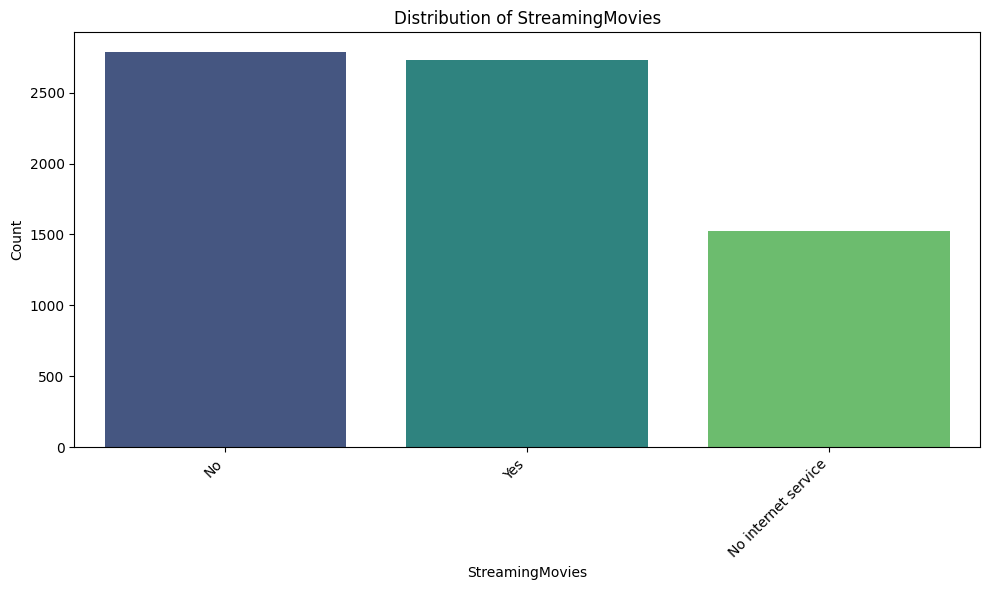

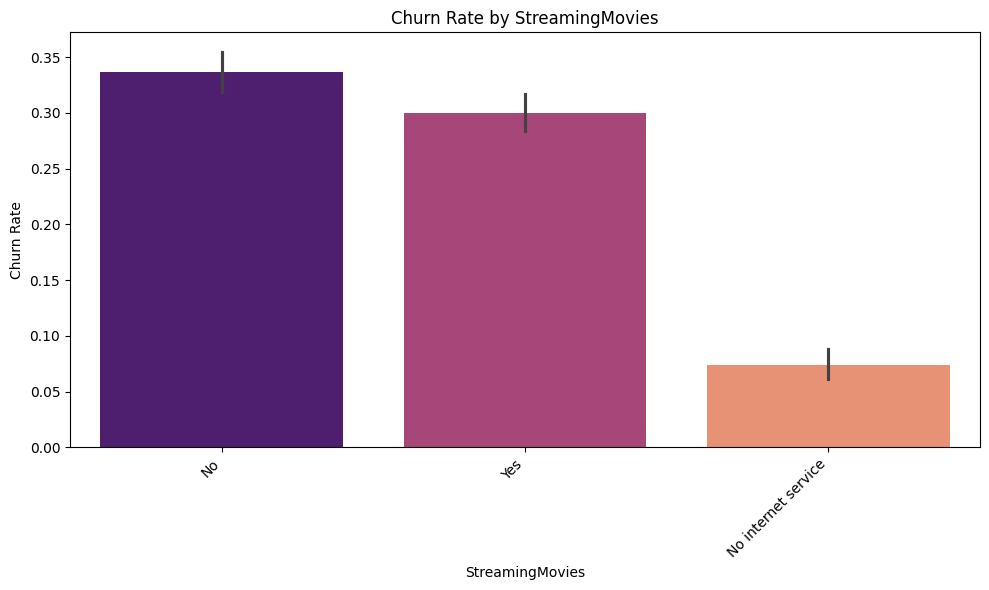

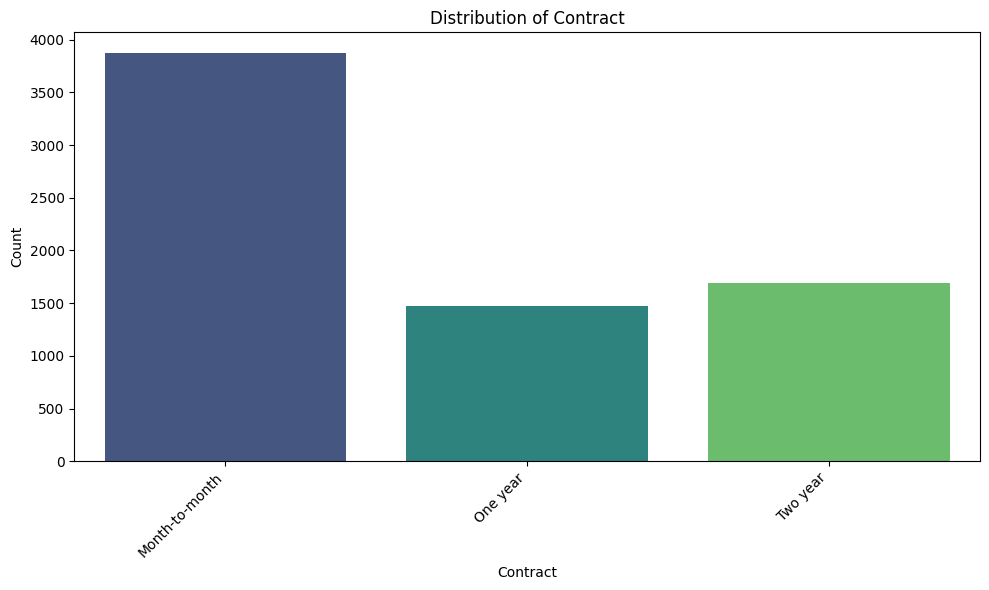

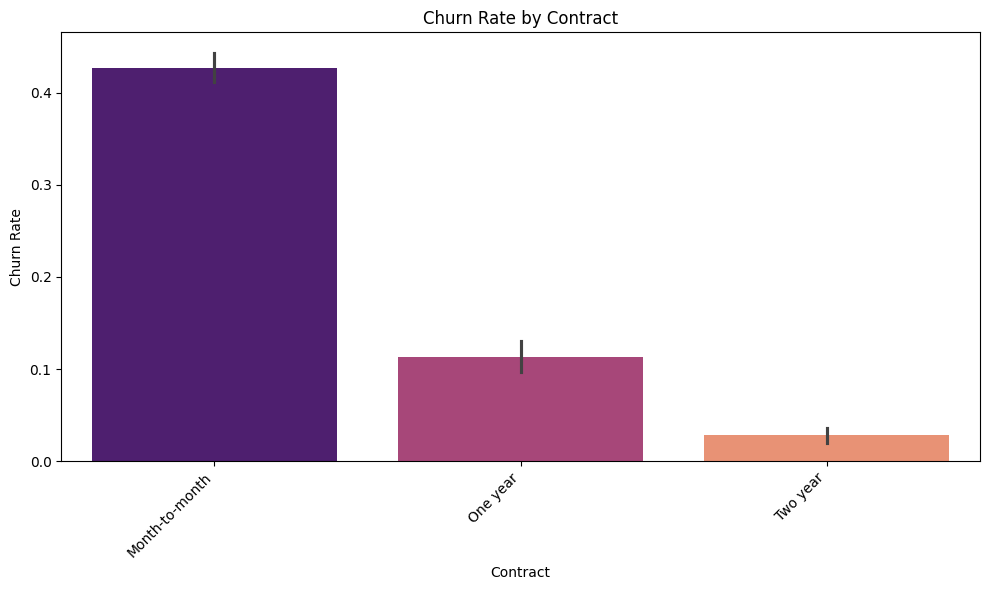

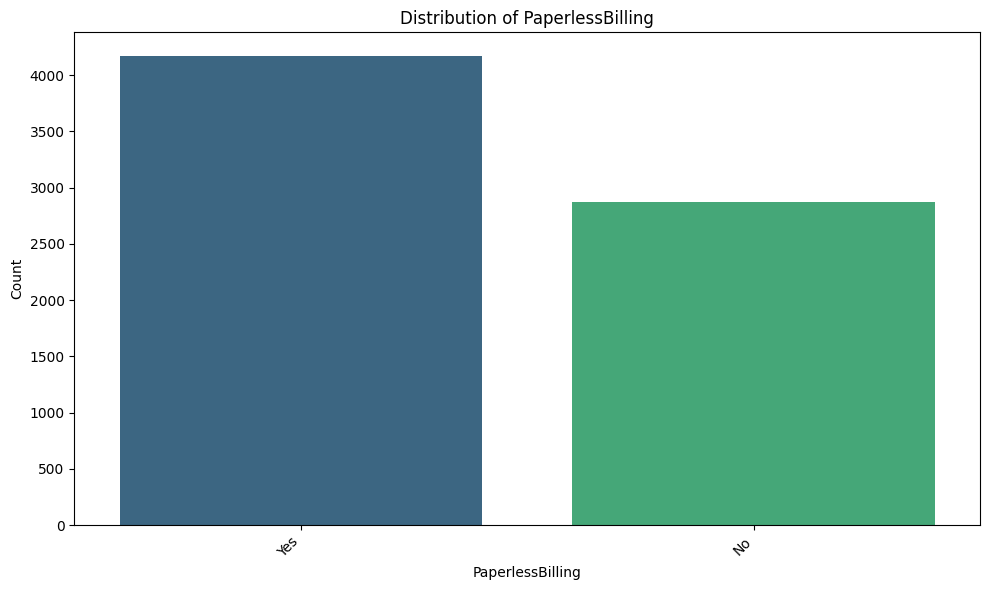

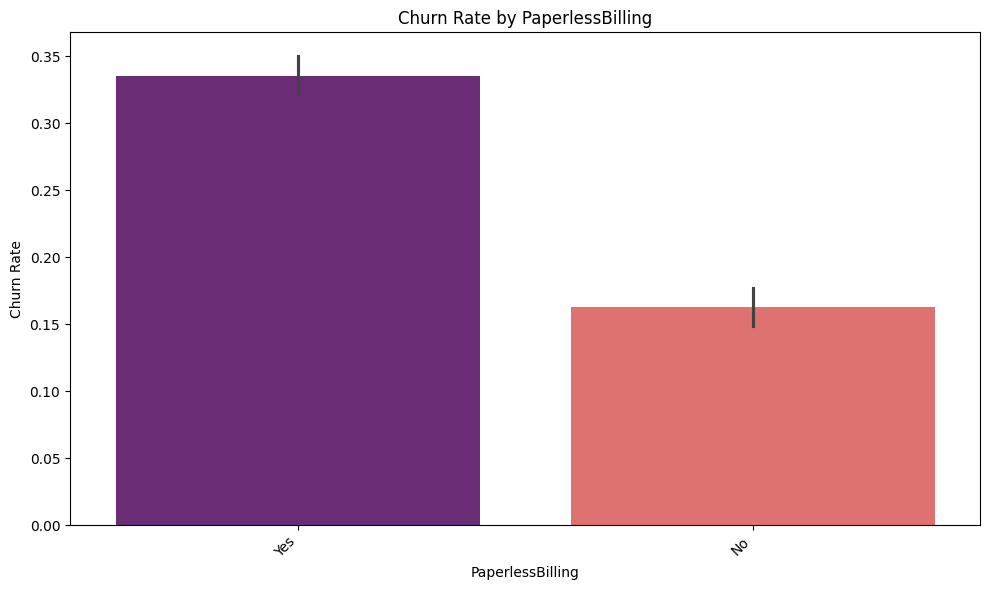

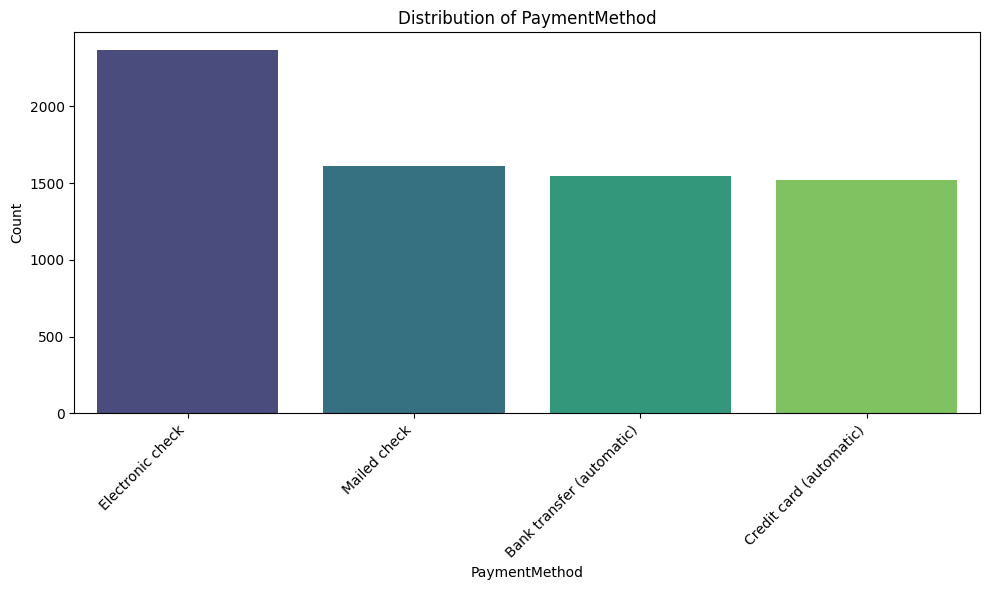

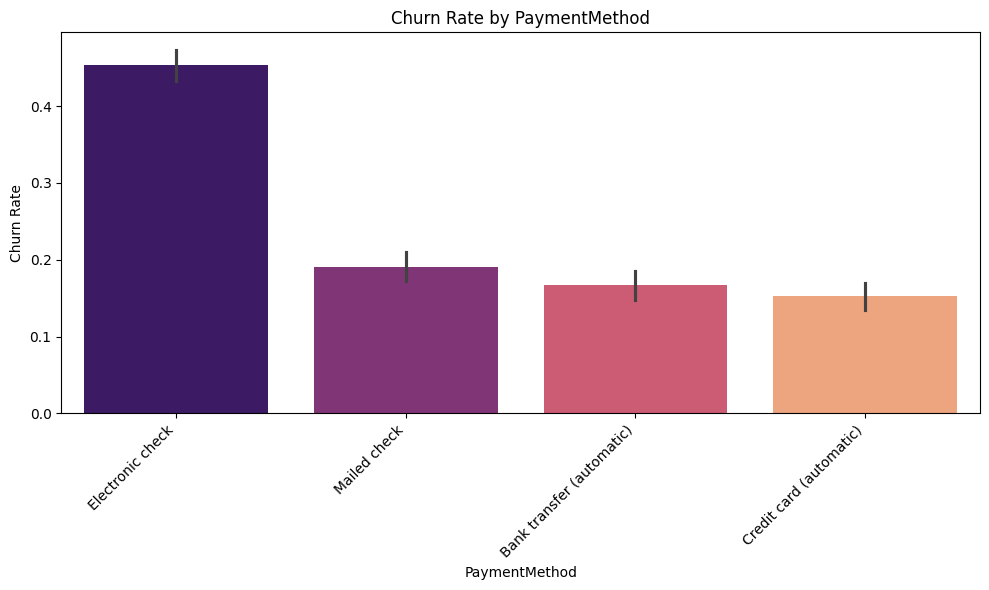

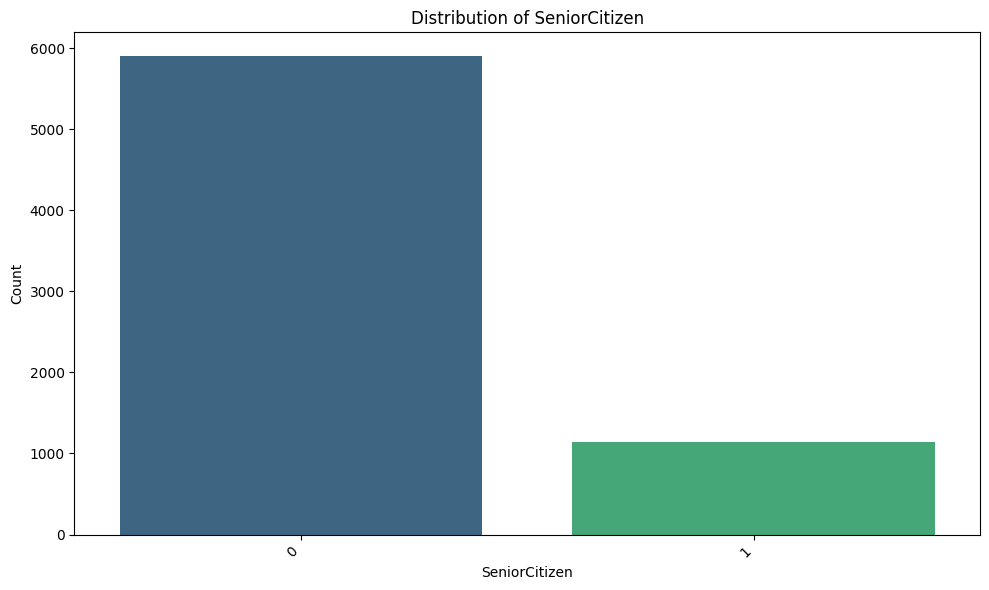

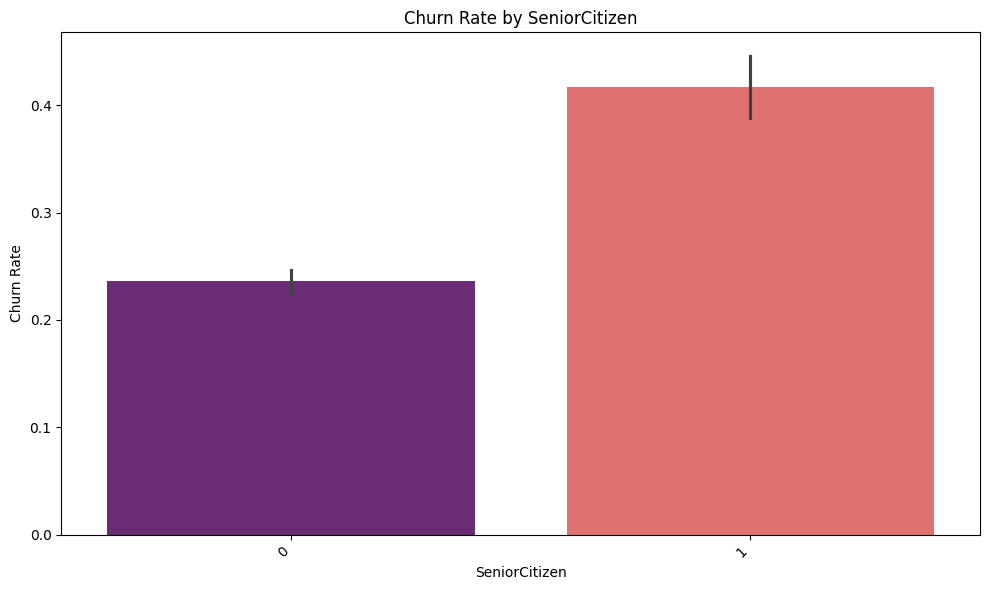

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Identify categorical columns (excluding 'customerID' and 'Churn')
categorical_cols = df.select_dtypes(include='object').columns.tolist()
categorical_cols = [col for col in categorical_cols if col not in ['customerID']]

# Add 'SeniorCitizen' to categorical_cols if it's not already there and treat it as categorical
# Although it's int64, its values are 0 or 1, making it a categorical feature.
if 'SeniorCitizen' not in categorical_cols:
    categorical_cols.append('SeniorCitizen')

print("Categorical columns identified for analysis:", categorical_cols)

for col in categorical_cols:
    # Count plot for distribution of categories
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col, hue=col, palette='viridis', legend=False)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # Bar plot for churn rate per category
    plt.figure(figsize=(10, 6))
    sns.barplot(data=df, x=col, y='Churn', hue=col, palette='magma', legend=False)
    plt.title(f'Churn Rate by {col}')
    plt.xlabel(col)
    plt.ylabel('Churn Rate')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

Numerical columns identified for analysis: ['tenure', 'MonthlyCharges', 'TotalCharges']


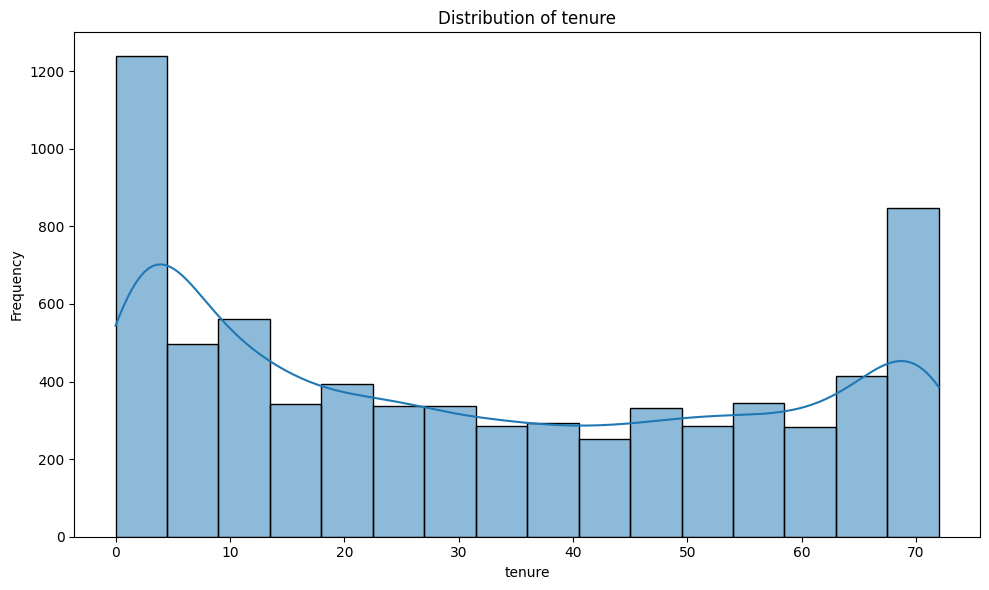

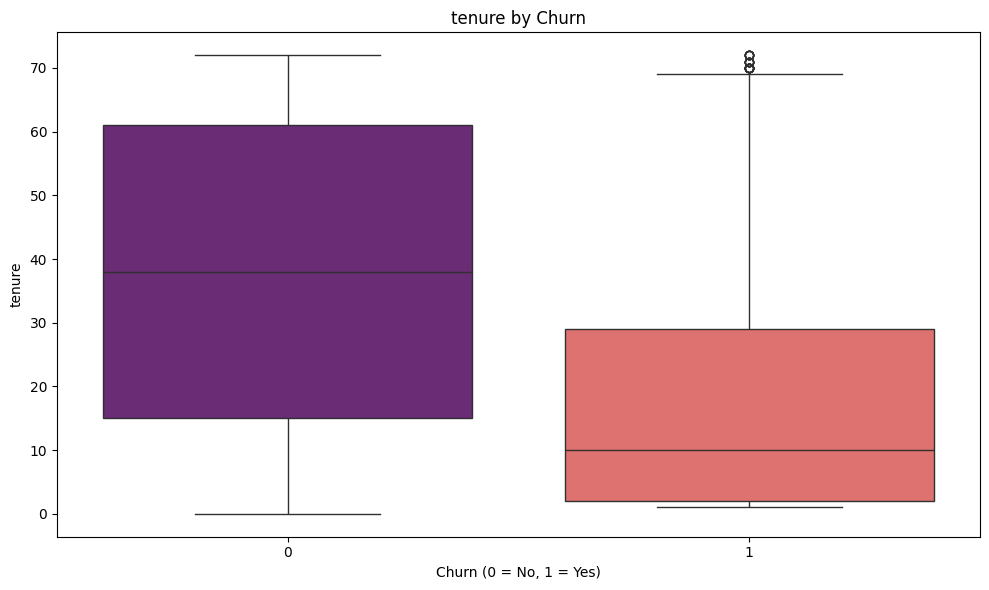

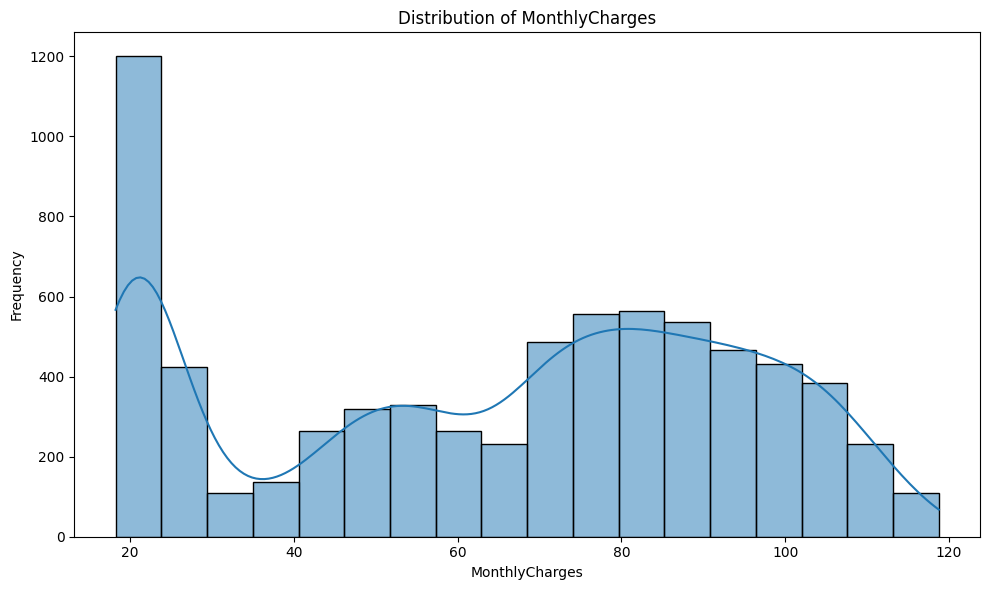

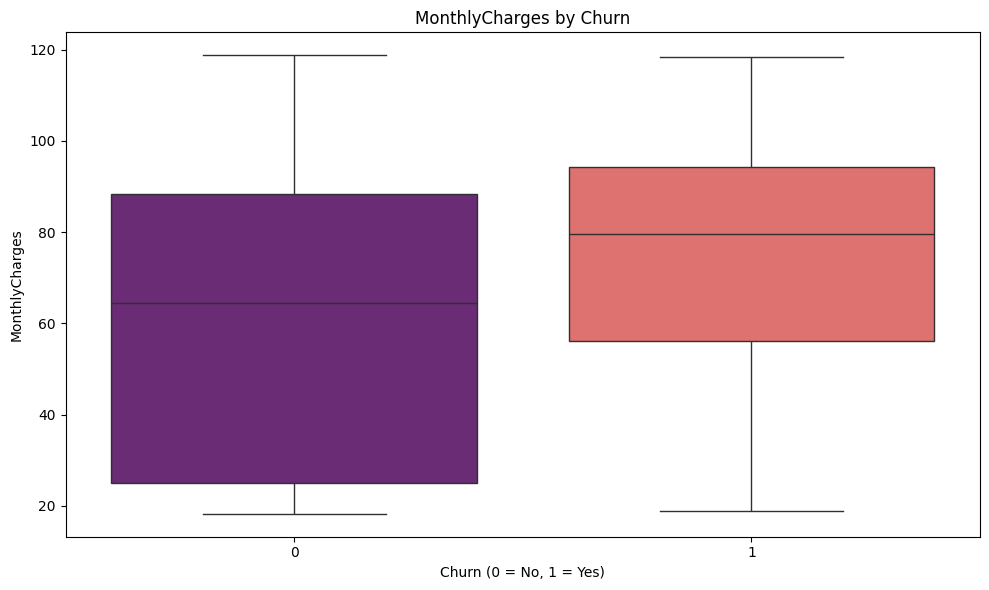

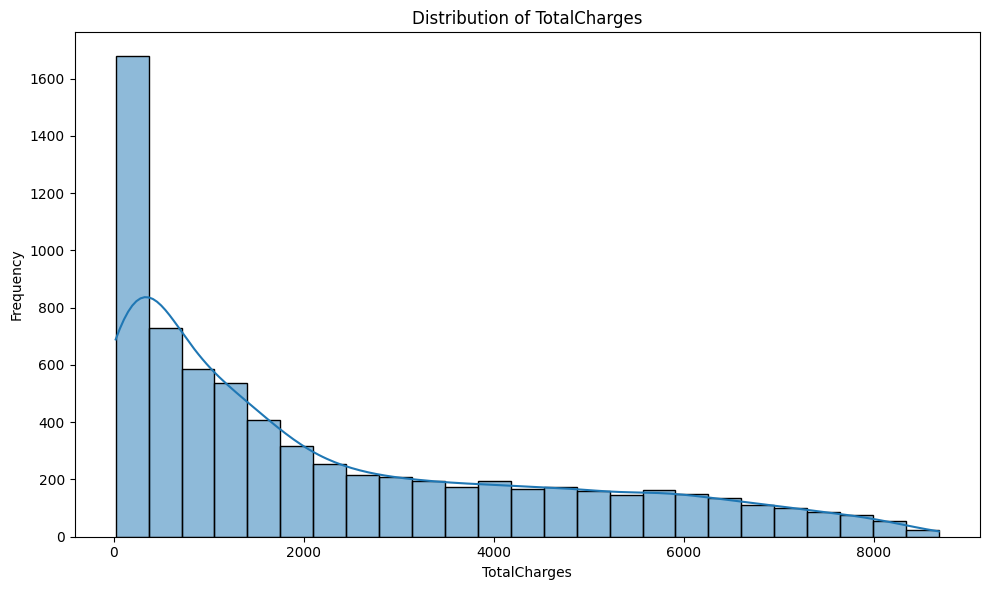

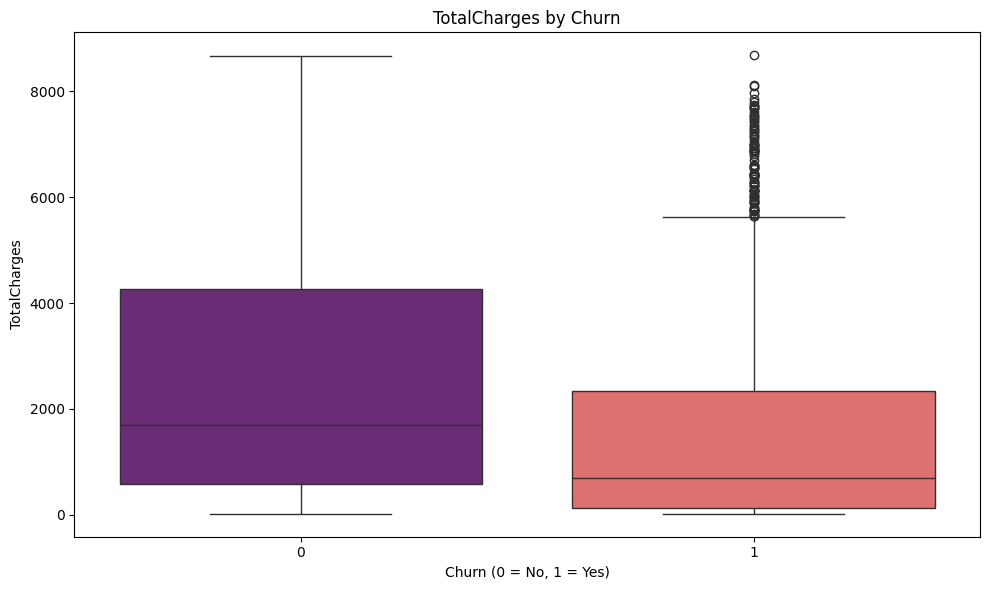

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Identify numerical columns (excluding 'Churn' and 'SeniorCitizen')
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols = [col for col in numerical_cols if col not in ['Churn', 'SeniorCitizen']]

print("Numerical columns identified for analysis:", numerical_cols)

for col in numerical_cols:
    # Histogram for distribution
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

    # Box plot for churn rate per category
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='Churn', y=col, hue='Churn', palette='magma', legend=False)
    plt.title(f'{col} by Churn')
    plt.xlabel('Churn (0 = No, 1 = Yes)')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

Columns for correlation analysis: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']


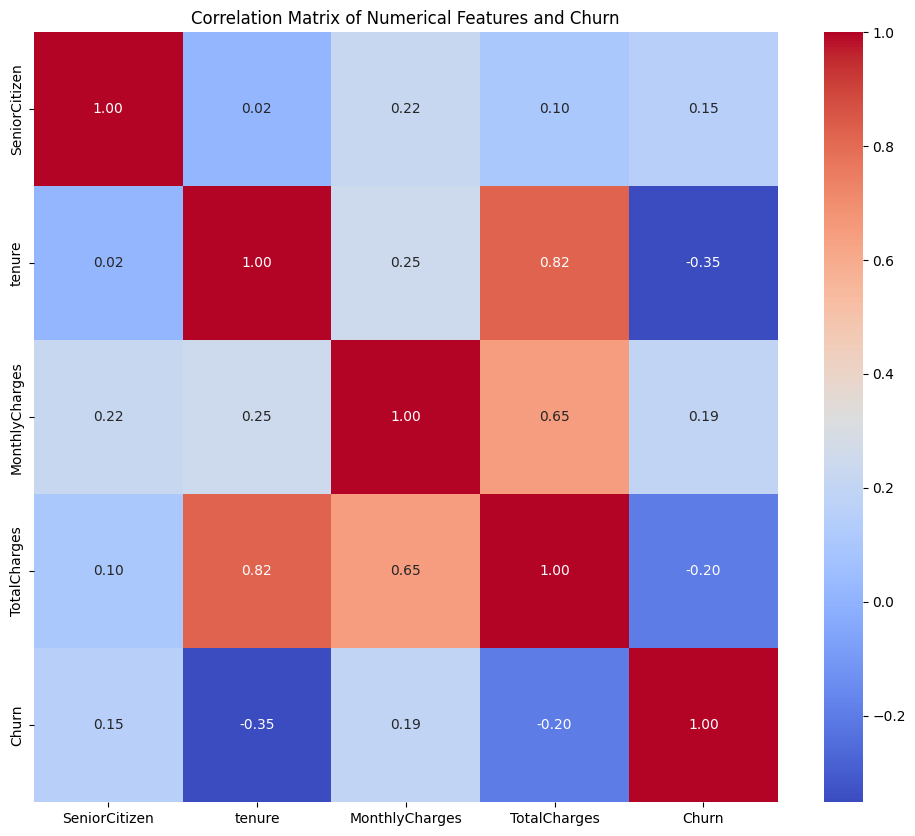

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Identify numerical columns (including 'Churn' for correlation with other numerical features)
# SeniorCitizen is also numerical (0/1) so it should be included for correlation analysis.
correlation_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Columns for correlation analysis:", correlation_cols)

# Calculate the correlation matrix
correlation_matrix = df[correlation_cols].corr()

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features and Churn')
plt.show()

In [ ]:

X = df[['tenure', 'MonthlyCharges', 'TotalCharges']]
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, pred))

Accuracy: 0.7771469127040455
